In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
import matplotlib.colors as mc
import colorsys
from random import randint
from matplotlib import font_manager, rc
matplotlib.rcParams['animation.embed_limit'] ='20978587'


# url = 'https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations'
# df = pd.read_csv(url, usecols=['name', 'group', 'year', 'value'])
# df.head(3)

url = 'output1.csv'

df = pd.read_csv(url,usecols=['name', 'group', 'year', 'value'],encoding='CP949')

df.head(3)

,year,group,name,value
0,20110103,KBS1,일일연속극(웃어라동해야),31.2
1,20110103,KBS1,KBS9시뉴스,18.8
2,20110103,SBS,SBS대기획(아테나전쟁의여신),16.3


In [2]:
# colors 

def transform_color(color, amount = 0.5):

    try:
        c = mc.cnames[color]
    except:
        c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

all_names = df['name'].unique().tolist()
random_hex_colors = []
group_lk = df.set_index('name')['group'].to_dict()


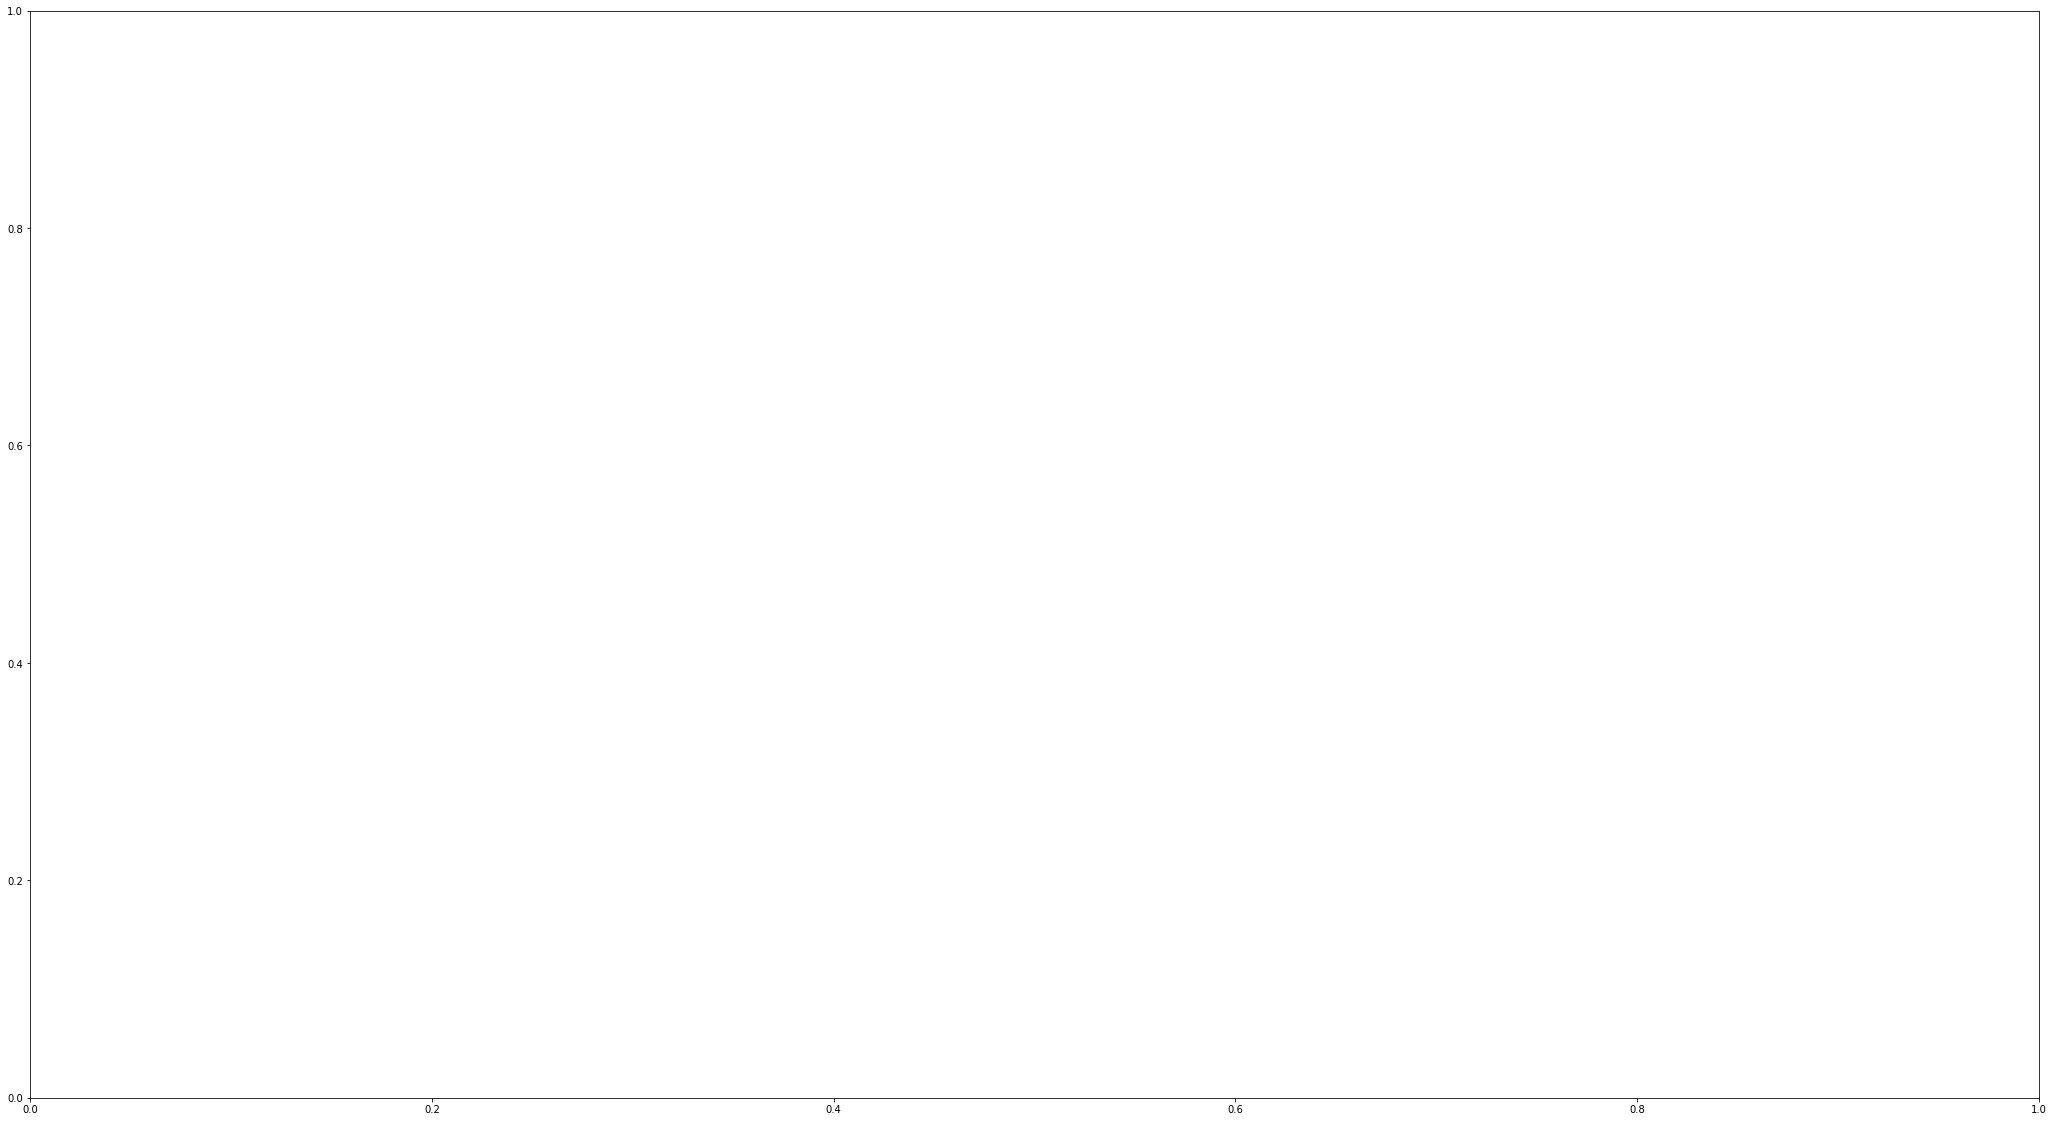

In [3]:
for i in range(len(all_names)):
    random_hex_colors.append('#' + '%06X' % randint(0, 0xFFFFFF))

rgb_colors = [transform_color(i, 1) for i in random_hex_colors]
rgb_colors_opacity = [rgb_colors[x] + (0.825,) for x in range(len(rgb_colors))]
rgb_colors_dark = [transform_color(i, 1.12) for i in random_hex_colors]

fig, ax = plt.subplots(figsize = (36, 20))

num_of_elements = 10

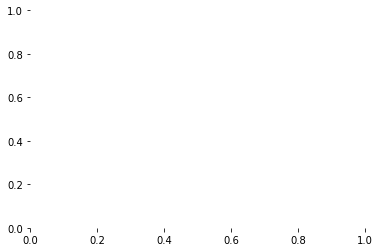

In [4]:
def draw_barchart(current_year):
    dff = df[df['year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    
    normal_colors = dict(zip(df['name'].unique(), rgb_colors_opacity))
    
    
#   ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    ax.barh(dff['name'], dff['value'], color = [normal_colors[x] for x in dff['name']])
    
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,name,size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i, f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Analysis: metropolitan area, household, unit:%', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'The most populous TV Program in Korea from 2011 to 2020',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
 
    plt.box(False)
    
draw_barchart(1502)

In [5]:
frames_list = df["year"].unique().tolist()
for i in range(10):
    frames_list.append(df['year'].iloc[-1])
    

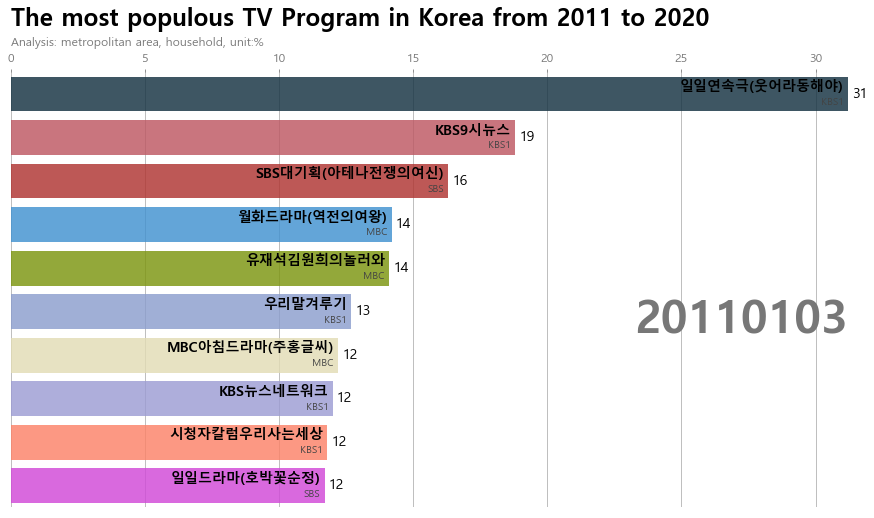

In [6]:

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, ax = plt.subplots(figsize=(15, 8))
# animator = animation.FuncAnimation(fig, draw_barchart, frames=range(20160905,20161031))
animator = animation.FuncAnimation(fig, draw_barchart, frames=frames_list)
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save() 

# HTML(animator.to_html5_video( )) 
# animator.save( 'test.mp4') 

# with plt.xkcd():
#     fig, ax = plt.subplots(figsize=(15, 8))
#     draw_barchart(2018)

# plt.xkcd()
plt.show()

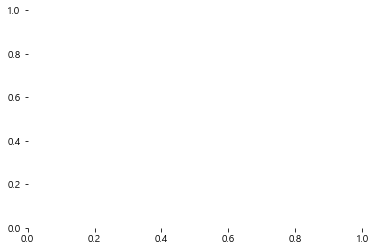

In [7]:
animator.save( 'test_x1.mp4') 

In [8]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.xkcd()

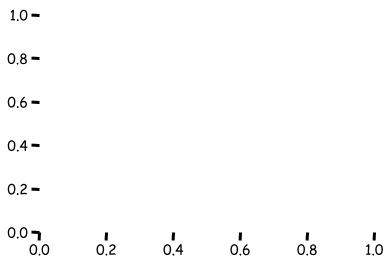

In [10]:
animator.save( 'test_x11.mp4') 